\begin{equation}
C_{j+1}^{n+1}*(\alpha_{j}^{n} - \beta_{j}^{n}) + C_{j}^{n+1}* (1 +2*\beta_{j}^{n}) + C_{j-1}^{n+1} *(-\beta_{j}^{n} - \alpha_{j}^{n}) = C_{j+1}^{n}*(\beta_{j}^{n+1} - \alpha_{j}^{n+1}) + C_{j}^{n}* (1- 2*\beta_{j}^{n+1}) + C_{j-1}^{n} *(\beta_{j}^{n+1} +\alpha_{j}^{n+1})
\end{equation}


Com as seguintes condições iniciais e de contorno:

\begin{equation}
    C(x,t=0) = C_{0}
\end{equation}

Condição de contorno:

\begin{equation}
c(0, t)= 35 psu
\end{equation}

\begin{equation}
c(L, t)= 0
\end{equation}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.sparse as sp
import scipy.sparse.linalg 
import scipy.linalg as la
from numpy import zeros
import pandas as pd

In [3]:
# #===============================================================
# # Definir velocidade interpolada no tempo e espaço
# #===============================================================

df = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/68e89c45fa0fb09166efee46afa40b885cb9fb26/Trabalho_3/Arquivos_base/dominio_1_corrigido.xlsx?raw=true' ,sheet_name= 'interpolado_10_25')
df.drop(labels = [df.columns[7],df.columns[8],df.columns[9]], axis = 1, inplace=True)

# # organizar os dataframes para cada hora a se interpolar

df_h1 = df.iloc[:,0:9]
df_h1= df_h1.drop(['0_elev', '1_elev'], axis = 1) # primeira hora para interpolar

df_h2 = df.iloc[:,0:11]
dummy = df_h2['1_vel']
df_h2= df_h2.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev'], axis = 1) 
df_h2.insert(0,'1_vel', dummy)

df_h3 = df.iloc[:,0:13]
dummy = df_h3['2_vel']
df_h3= df_h3.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev'], axis = 1) 
df_h3.insert(0,'2_vel', dummy)

df_h4 = df.iloc[:,0:15]
dummy = df_h4['3_vel']
df_h4= df_h4.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev'], axis = 1) 
df_h4.insert(0,'3_vel', dummy)

df_h5 = df.iloc[:,0:17]
dummy = df_h5['4_vel']
df_h5= df_h5.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev'], axis = 1) 
df_h5.insert(0,'4_vel', dummy)

df_h6 = df.iloc[:,0:19]
dummy = df_h6['5_vel']
df_h6= df_h6.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev'], axis = 1) 
df_h6.insert(0,'5_vel', dummy)

df_h7 = df.iloc[:,0:21]
dummy = df_h7['6_vel']
df_h7= df_h7.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev'], axis = 1) 
df_h7.insert(0,'6_vel', dummy)

df_h8 = df.iloc[:,0:23]
dummy = df_h8['7_vel']
df_h8= df_h8.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev'], axis = 1) 
df_h8.insert(0,'7_vel', dummy)

df_h9 = df.iloc[:,0:25]
dummy = df_h9['8_vel']
df_h9= df_h9.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev'], axis = 1) 
df_h9.insert(0,'8_vel', dummy)

df_h10 = df.iloc[:,0:27]
dummy = df_h10['9_vel']
df_h10= df_h10.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev'], axis = 1) 
df_h10.insert(0,'9_vel', dummy)

df_h11 = df.iloc[:,0:29]
dummy = df_h11['10_vel']
df_h11= df_h11.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_elev'], axis = 1) 
df_h11.insert(0,'10_vel', dummy)

df_h12 = df.iloc[:,0:31]
dummy = df_h12['11_vel']
df_h12= df_h12.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_elev', '11_vel', '12_elev'], axis = 1) 
df_h12.insert(0,'11_vel', dummy)

df_h13 = df.iloc[:,0:33]
dummy = df_h13['12_vel']
df_h13= df_h13.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_elev', '11_vel', '12_elev', '12_vel', '13_elev'], axis = 1) 
df_h13.insert(0,'12_vel', dummy)

interpolacao = pd.DataFrame(df_h1).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
df = interpolacao

interpolacao = pd.DataFrame(df_h2).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.1', '2.1', '3.1', '4.1','5.1', '2_vel']
df = df.join(interpolacao)

interpolacao = pd.DataFrame(df_h3).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.2', '2.2', '3.2', '4.2','5.2', '3_vel']
df = df.join(interpolacao)

interpolacao = pd.DataFrame(df_h4).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.3', '2.3', '3.3', '4.3', '5.3','4_vel']
df = df.join(interpolacao)

interpolacao = pd.DataFrame(df_h5).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.4', '2.4', '3.4', '4.4','5.4', '5_vel']
df = df.join(interpolacao)

interpolacao = pd.DataFrame(df_h6).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.5', '2.5', '3.5', '4.5', '5.5', '6_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h7).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.6', '2.6', '3.6', '4.6','5.6', '7_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h8).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.7', '2.7', '3.7', '4.7', '5.7', '8_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h9).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.8', '2.8', '3.8', '4.8','5.8', '9_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h10).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.9', '2.9', '3.9', '4.9','5.9', '10_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h11).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.10', '2.10', '3.10', '4.10','5.10', '11_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h12).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.11', '2.11', '3.11', '4.11','5.11',  '12_vel']
df = df.join(interpolacao) 

interpolacao = pd.DataFrame(df_h13).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.12', '2.12', '3.12', '4.12','5.12', '13_vel']
df = df.join(interpolacao)

In [4]:
df

,0_vel,1,2,3,4,5,1_vel,1.1,2.1,3.1,...,3.11,4.11,5.11,12_vel,1.12,2.12,3.12,4.12,5.12,13_vel
0,-0.969095,-0.958034,-0.946972,-0.935911,-0.924849,-0.913787,-0.902726,-0.853977,-0.805228,-0.756479,...,-0.788990,-0.833750,-0.878511,-0.923271,-0.929487,-0.935702,-0.941917,-0.948133,-0.954348,-0.960563
1,-0.969192,-0.958140,-0.947088,-0.936036,-0.924984,-0.913932,-0.902881,-0.854139,-0.805397,-0.756654,...,-0.788978,-0.833757,-0.878536,-0.923315,-0.929546,-0.935777,-0.942007,-0.948238,-0.954469,-0.960699
2,-0.969288,-0.958246,-0.947204,-0.936162,-0.925120,-0.914078,-0.903035,-0.854300,-0.805565,-0.756830,...,-0.788966,-0.833763,-0.878561,-0.923359,-0.929605,-0.935851,-0.942097,-0.948343,-0.954589,-0.960835
3,-0.969384,-0.958352,-0.947320,-0.936287,-0.925255,-0.914223,-0.903190,-0.854462,-0.805734,-0.757006,...,-0.788954,-0.833770,-0.878586,-0.923403,-0.929664,-0.935926,-0.942187,-0.948449,-0.954710,-0.960972
4,-0.969480,-0.958458,-0.947435,-0.936413,-0.925390,-0.914368,-0.903345,-0.854624,-0.805903,-0.757182,...,-0.788942,-0.833777,-0.878612,-0.923446,-0.929723,-0.936000,-0.942277,-0.948554,-0.954831,-0.961108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,0.437833,0.406785,0.375737,0.344689,0.313641,0.282594,0.251546,0.233288,0.215031,0.196774,...,0.425995,0.434541,0.443086,0.451631,0.434558,0.417485,0.400412,0.383340,0.366267,0.349194
4136,0.437833,0.406785,0.375737,0.344689,0.313641,0.282594,0.251546,0.233288,0.215031,0.196774,...,0.425995,0.434541,0.443086,0.451631,0.434558,0.417485,0.400412,0.383340,0.366267,0.349194
4137,0.437833,0.406785,0.375737,0.344689,0.313641,0.282594,0.251546,0.233288,0.215031,0.196774,...,0.425995,0.434541,0.443086,0.451631,0.434558,0.417485,0.400412,0.383340,0.366267,0.349194
4138,0.437833,0.406785,0.375737,0.344689,0.313641,0.282594,0.251546,0.233288,0.215031,0.196774,...,0.425995,0.434541,0.443086,0.451631,0.434558,0.417485,0.400412,0.383340,0.366267,0.349194


In [5]:
# #===============================================================
# # Definir a elevação interpolada no tempo e espaço
# #===============================================================

df_elev = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/68e89c45fa0fb09166efee46afa40b885cb9fb26/Trabalho_3/Arquivos_base/dominio_1_corrigido.xlsx?raw=true' ,sheet_name= 'interpolado_10_25')
df_elev.drop(labels = [df_elev.columns[7],df_elev.columns[8],df_elev.columns[9]], axis = 1, inplace=True)
df_elev

# # organizar os dataframes para cada hora a se interpolar

df_elev_h1 = df_elev.iloc[:,0:9]
df_elev_h1= df_elev_h1.drop(['0_vel', '1_vel'], axis = 1) # primeira hora para interpolar

df_elev_h2 = df_elev.iloc[:,0:11]
dummy = df_elev_h2['1_elev']
df_elev_h2= df_elev_h2.drop(['0_elev','0_vel', '1_elev','1_vel','2_vel'], axis = 1) 
df_elev_h2.insert(0,'1_elev', dummy)

df_elev_h3 = df_elev.iloc[:,0:13]
dummy = df_elev_h3['2_elev']
df_elev_h3= df_elev_h3.drop(['0_elev','0_vel', '1_elev','1_vel','2_vel', '2_elev', '3_vel'], axis = 1) 
df_elev_h3.insert(0,'2_elev', dummy)

df_elev_h4 = df_elev.iloc[:,0:15]
dummy = df_elev_h4['3_elev']
df_elev_h4= df_elev_h4.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_vel'], axis = 1) 
df_elev_h4.insert(0,'3_elev', dummy)

df_elev_h5 = df_elev.iloc[:,0:17]
dummy = df_elev_h5['4_elev']
df_elev_h5= df_elev_h5.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_vel'], axis = 1) 
df_elev_h5.insert(0,'4_elev', dummy)

df_elev_h6 = df_elev.iloc[:,0:19]
dummy = df_elev_h6['5_elev']
df_elev_h6= df_elev_h6.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_vel'], axis = 1) 
df_elev_h6.insert(0,'5_elev', dummy)

df_elev_h7 = df_elev.iloc[:,0:21]
dummy = df_elev_h7['6_elev']
df_elev_h7= df_elev_h7.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_vel'], axis = 1) 
df_elev_h7.insert(0,'6_elev', dummy)

df_elev_h8 = df_elev.iloc[:,0:23]
dummy = df_elev_h8['7_elev']
df_elev_h8= df_elev_h8.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_vel'], axis = 1) 
df_elev_h8.insert(0,'7_elev', dummy)

df_elev_h9 = df_elev.iloc[:,0:25]
dummy = df_elev_h9['8_elev']
df_elev_h9= df_elev_h9.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_vel'], axis = 1) 
df_elev_h9.insert(0,'8_elev', dummy)

df_elev_h10 = df_elev.iloc[:,0:27]
dummy = df_elev_h10['9_elev']
df_elev_h10= df_elev_h10.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_vel'], axis = 1) 
df_elev_h10.insert(0,'9_elev', dummy)

df_elev_h11 = df_elev.iloc[:,0:29]
dummy = df_elev_h11['10_elev']
df_elev_h11= df_elev_h11.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_vel'], axis = 1) 
df_elev_h11.insert(0,'10_elev', dummy)

df_elev_h12 = df_elev.iloc[:,0:31]
dummy = df_elev_h12['11_elev']
df_elev_h12= df_elev_h12.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_elev', '11_vel', '12_vel'], axis = 1) 
df_elev_h12.insert(0,'11_elev', dummy)

df_elev_h13 = df_elev.iloc[:,0:33]
dummy = df_elev_h13['12_elev']
df_elev_h13= df_elev_h13.drop(['0_elev','0_vel', '1_elev','1_vel','2_elev','2_vel','3_elev','3_vel','4_elev','4_vel','5_elev','5_vel','6_elev','6_vel', '7_elev', '7_vel', '8_elev', '8_vel', '9_elev', '9_vel', '10_elev', '10_vel', '11_elev', '11_vel', '12_elev', '12_vel', '13_vel'], axis = 1) 
df_elev_h13.insert(0,'12_elev', dummy)

interpolacao = pd.DataFrame(df_elev_h1).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
df_elev = interpolacao

interpolacao = pd.DataFrame(df_elev_h2).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.1', '2.1', '3.1', '4.1','5.1', '2_elev']
df_elev = df_elev.join(interpolacao)

interpolacao = pd.DataFrame(df_elev_h3).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.2', '2.2', '3.2', '4.2','5.2', '3_elev']
df_elev = df_elev.join(interpolacao)

interpolacao = pd.DataFrame(df_elev_h4).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.3', '2.3', '3.3', '4.3', '5.3','4_elev']
df_elev = df_elev.join(interpolacao)

interpolacao = pd.DataFrame(df_h5).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.4', '2.4', '3.4', '4.4','5.4', '5_elev']
df_elev = df_elev.join(interpolacao)

interpolacao = pd.DataFrame(df_elev_h6).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.5', '2.5', '3.5', '4.5', '5.5', '6_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h7).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.6', '2.6', '3.6', '4.6','5.6', '7_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h8).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.7', '2.7', '3.7', '4.7', '5.7', '8_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h9).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.8', '2.8', '3.8', '4.8','5.8', '9_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h10).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.9', '2.9', '3.9', '4.9','5.9', '10_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h11).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.10', '2.10', '3.10', '4.10','5.10', '11_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h12).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.11', '2.11', '3.11', '4.11','5.11',  '12_elev']
df_elev = df_elev.join(interpolacao) 

interpolacao = pd.DataFrame(df_elev_h13).interpolate()
interpolacao = interpolacao.interpolate(axis=1)
interpolacao.drop(labels= [interpolacao.columns[0]], axis=1, inplace=True)
interpolacao.columns = ['1.12', '2.12', '3.12', '4.12','5.12', '13_elev']
df_elev = df_elev.join(interpolacao) 
df_elev

,0_elev,1,2,3,4,5,1_elev,1.1,2.1,3.1,...,3.11,4.11,5.11,12_elev,1.12,2.12,3.12,4.12,5.12,13_elev
0,-1.049971,-1.016877,-0.983782,-0.950688,-0.917593,-0.884499,-0.851404,-0.787629,-0.723853,-0.660078,...,-1.050985,-1.059689,-1.068392,-1.077096,-1.057115,-1.037133,-1.017152,-0.997170,-0.977188,-0.957207
1,-1.078430,-1.044361,-1.010291,-0.976222,-0.942152,-0.908083,-0.874014,-0.808538,-0.743062,-0.677587,...,-1.077902,-1.087173,-1.096445,-1.105716,-1.085278,-1.064840,-1.044403,-1.023965,-1.003527,-0.983089
2,-1.106889,-1.071845,-1.036800,-1.001756,-0.966712,-0.931667,-0.896623,-0.829447,-0.762271,-0.695096,...,-1.104819,-1.114658,-1.124497,-1.134336,-1.113442,-1.092548,-1.071654,-1.050759,-1.029865,-1.008971
3,-1.135348,-1.099329,-1.063309,-1.027290,-0.991271,-0.955251,-0.919232,-0.850356,-0.781480,-0.712605,...,-1.131736,-1.142143,-1.152549,-1.162956,-1.141606,-1.120255,-1.098905,-1.077554,-1.056204,-1.034853
4,-1.163807,-1.126813,-1.089819,-1.052824,-1.015830,-0.978836,-0.941841,-0.871265,-0.800689,-0.730114,...,-1.158653,-1.169627,-1.180602,-1.191576,-1.169769,-1.147962,-1.126156,-1.104349,-1.082542,-1.060735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,-0.003380,-0.003405,-0.003429,-0.003454,-0.003479,-0.003503,-0.003528,-0.003544,-0.003559,-0.003575,...,-0.003389,-0.003383,-0.003376,-0.003370,-0.003383,-0.003396,-0.003409,-0.003422,-0.003436,-0.003449
4136,-0.003380,-0.003405,-0.003429,-0.003454,-0.003479,-0.003503,-0.003528,-0.003544,-0.003559,-0.003575,...,-0.003389,-0.003383,-0.003376,-0.003370,-0.003383,-0.003396,-0.003409,-0.003422,-0.003436,-0.003449
4137,-0.003380,-0.003405,-0.003429,-0.003454,-0.003479,-0.003503,-0.003528,-0.003544,-0.003559,-0.003575,...,-0.003389,-0.003383,-0.003376,-0.003370,-0.003383,-0.003396,-0.003409,-0.003422,-0.003436,-0.003449
4138,-0.003380,-0.003405,-0.003429,-0.003454,-0.003479,-0.003503,-0.003528,-0.003544,-0.003559,-0.003575,...,-0.003389,-0.003383,-0.003376,-0.003370,-0.003383,-0.003396,-0.003409,-0.003422,-0.003436,-0.003449


In [6]:
#===============================================================
# Defining parameters
#===============================================================

tmin = 0.
tmax = 780.0 # Tempo total de análise - 24 hrs = 1440 min
dt = 10.0 # Passo no tempo dt = 10min
nt = int(tmax/dt) # Número de iterações no tempo
t = np.arange(tmin, tmax, dt) # vetor tempo para plotar

xmin = 0.
xmax = 100900.0 # Distância total percorrida - m
dx = 25.0 # Passo no espaço - m
nx = int(xmax/dx) # Número de pontos em x, considera x=0 e x=xmax
x = np.arange(xmin, xmax, dx)

# H = 4.0 # m
# #===============================================================
# # Stability check
# #===============================================================

# courant = 1.6*dt/dx                 # Número de Courant <= 1
# if courant <= 1:
#   print('Courant: OK')
# else:
#   print('Courant: Corrigir')

# neumann = (0.1*1.6*H) *dt/dx**2             # Von Neumann <= 1/2
# if neumann <= 0.5:
#   print('Neumann: OK')
# else:
#   print('Neumann: Corrigir')
  
#===============================================================
# Definir componentes da matriz tridiagonal (A*u = b) -> vetor b
#===============================================================

b = np.zeros(nx)

# Aplicar condição inicial 

ci = 0 # c(x.t=0) = 0

def CI(x):                                                 # define a condição inicial
    if xmin <= x <= xmax:
        return ci          

for i in range(nx):                                         # monta a condição inicial
   xi = i*dx
   b[i] = CI(xi)

# Aplicar as condições de contorno 

b[0] = 35.0 # c(x=1, t) = 35
b[nx-1] =  0 # c(x=xmax, t) = 0 

#===============================================================
# # Definir matriz tridiagonal de solução (A)
#===============================================================

# celeridade proveniente do data frame
u_estrela = np.zeros(nx+1)
u_estrela_new = np.zeros(nx+1)
D = np.zeros(nx +1)
D_new = np.zeros(nx +1)


k1 = np.zeros(nx+1)
k2 = np.zeros(nx+1)
k3 = np.zeros(nx+1)
k4 = np.zeros(nx+1)
k5 = np.zeros(nx+1)
k6 = np.zeros(nx+1)

A = (sp.eye(nx, k=-1) + sp.eye(nx) + sp.eye(nx, k=1)) # Matriz de solução (A)
A = sp.csr_matrix(A)

B = (sp.eye(nx, k=-1) + sp.eye(nx) + sp.eye(nx, k=1))
B = sp.csr_matrix(B)

In [7]:
#===============================================================
# Iterações no tempo e no espaço
#===============================================================

rows,cols = A.nonzero() # define as coordenadas dos valores não nulos

temp_resposta = np.zeros(nt) # define os tempos a se armazenar as respostas
for i in range(nt):
    if i%5 == 0:
        temp_resposta[i] = i

dummy_answer = zeros([nt, nx])
cont = 0

for n in range(1,nt-1):
    
    if n == nt/2:
        print('Metade concluido')
        
    if df.iloc[0,n] < 0 & n < 35:
        b[0] = 0.0
    if n > 35:    
        b[0] = 35.0
        
    for i in range(0, nx):
       
        u_estrela[i] = 0.1 *  df.iloc[i,n] 
        D[i] = 5.83 * u_estrela[i] * (4.0 + df_elev.iloc[i,n])
        u_estrela_new[i] = 0.1 * df.iloc[i,n+1]
        D_new[i] = 5.83 * u_estrela_new[i] * (4.0 + df_elev.iloc[i,n+1])

             
        k1[i]    =  -((df.iloc[i,n]/(2*dx)) + D[i]/(dx**2))         # Diagonal inferior 
        k2[i]    = 2/dt + (2*D[i])/(dx**2)                          # Diagonal meio
        k3[i]    = (df.iloc[i,n]/ (2*dx)) - (D[i]/(dx**2))          # Diagonal superior
        
        k4[i]    = 2/dt - (2*D_new[i])/(dx**2)                      # Diagonal meio
        k5[i]    = ((df.iloc[i,n+1])/(2*dx)) + (D_new[i]/(dx**2))   # Diagonal inferior 
        k6[i]    = (D_new[i]/(dx**2) - df.iloc[i,n+1]/(2*dx))       # Diagonal superior
 
    for row, col in zip(rows, cols):
        if row == col:
            A[row, col] = k2[row]
            B[row, col] = k4[row]
        if row > col:
            A[row,col] = k1[col]
            B[row,col] = k5[col]
        if row < col:
            A[row,col] = k3[row]
            B[row,col] = k6[row]
        
    A[0,0] = 1
    A[0,1] = 0
    A[nx-1,nx-1] = 1
    A[nx-1,nx-2] = 0
    
    B[0,0] = 1
    B[0,1] = 0
    B[nx-1,nx-1] = 1
    B[nx-1,nx-2] = 0
   
     
    
    u = sp.linalg.spsolve(A, B.dot(b))
    print(u)
    dummy_answer[n,:] = u 
    # print(dummy_answer)
    b = u
    
    # if cont == temp_resposta[n]:
    #     dummy_answer[n,:] = u
          
    cont +=1

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[35.          7.62036071  0.83086605 ...  0.          0.
  0.        ]
[35.         14.43442626  3.14109737 ...  0.          0.
  0.        ]
[35.         20.31

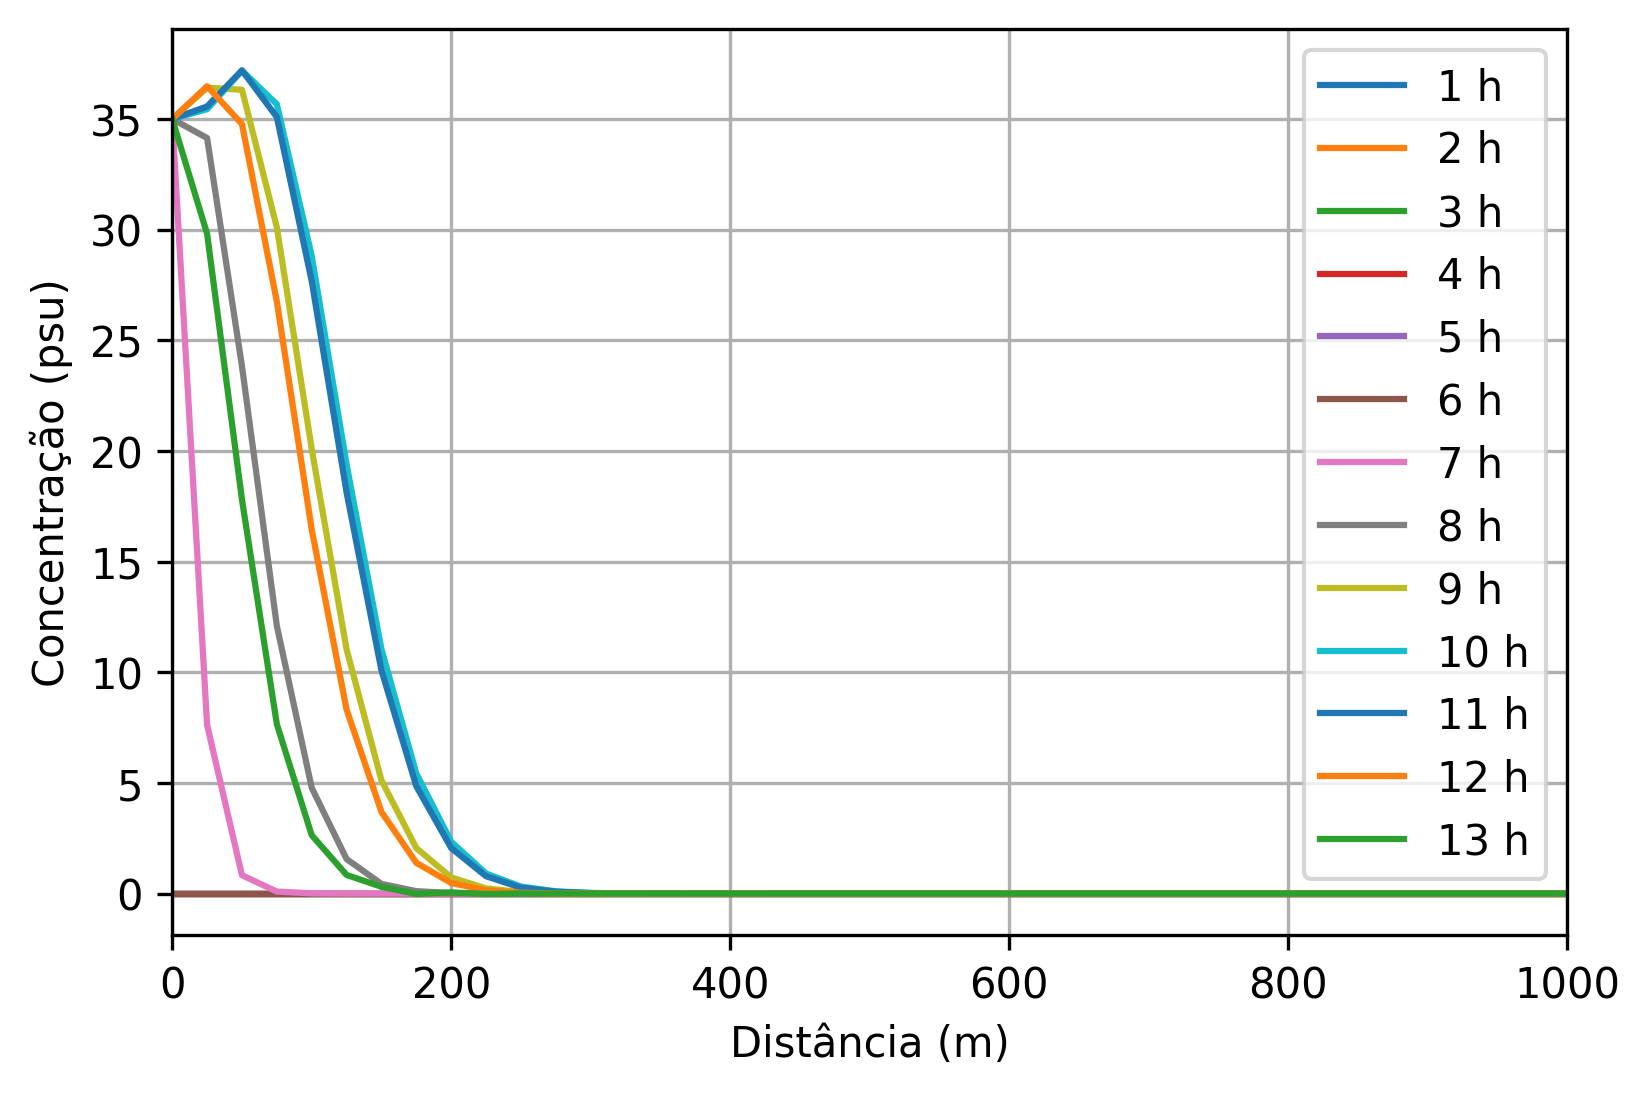

In [32]:
plt.figure(num=1, dpi=300)
for i in range (0, len(t), 6):
    # if i % 20 == 0:
    plt.plot(x, dummy_answer[i,:], label=f'{int(i / 6 + 1)} h')
plt.xlim(0,1000)
plt.xlabel('Distância (m)')
plt.ylabel('Concentração (psu)')
plt.legend()
plt.grid()
plt.savefig('figura_final.png')